In [15]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

# exibir imagens em grid
from matplotlib import pyplot as plt

def showImages(imgsArray, titlesArray, size, grid=(1,1)):
    y, x = grid
    fig, axes = plt.subplots(y, x, figsize=size)
    axes = axes.ravel() if isinstance(axes, np.ndarray) else np.array([axes])

    if len(imgsArray) != len(titlesArray):
        print("ERRO: O número de imagens e títulos deve ser o mesmo!")
        return

    for idx, (img, title) in enumerate(zip(imgsArray, titlesArray)):
        if len(img.shape) == 2:  # A imagem é tons de cinza
            axes[idx].imshow(img, cmap='gray')
        else:  # A imagem é RGB
            axes[idx].imshow(img)
        axes[idx].set_title(title, fontdict={'fontsize': 18, 'fontweight': 'medium'}, pad=10)
        if len(title) == 0:
            axes[idx].axis('off')

    plt.tight_layout()  # ajusta automaticamente o layout para evitar sobreposição
    plt.show()
    
#Para exibir uma única imagem:
#showImages([img1], ["Título 1"], size=(10,10), grid=(1,1))

#Para exibir duas imagens lado a lado:
#showImages([img1, img2], ["Título 1", "Título 2"], size=(10,10), grid=(1,2))

#Para exibir quatro imagens em uma grade 2x2:
#showImages([img1, img2, img3, img4], ["Título 1", "Título 2", "Título 3", "Título 4"], size=(10,10), grid=(2,2))

https://www.kaggle.com/datasets/vishalsubbiah/pokemon-images-and-types

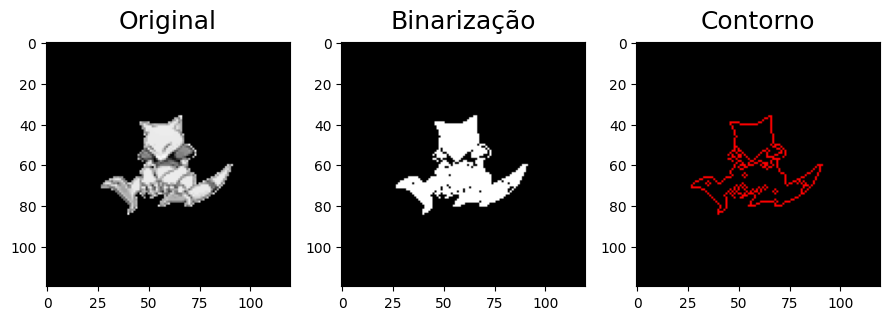

In [22]:
FOLDER = 'pokemon_dataset/images/'
POKEMON = 'abra'

img = cv2.imread(FOLDER + POKEMON + '.png')
assert img is not None, "file could not be read, check with os.path.exists()" # Verifica se a imagem foi carregada corretamente
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) # Converte a imagem de BGR para escala de cinza
ret, thresh = cv2.threshold(img_gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU) # Aplica um threshold para binarizar a imagem

contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

# Criar uma imagem em branco (preta)
img_contours = np.zeros_like(img)

# Desenhar os contornos na imagem em branco
cv2.drawContours(img_contours, contours, -1, (255, 0, 0), 1)

showImages([img_gray, thresh, img_contours], ["Original", "Binarização", "Contorno"], size=(9,7), grid=(1,3))

# Momentos de Imagens

Os momentos de uma imagem são características numéricas que descrevem várias propriedades da forma ou da distribuição de intensidade dos pixels na imagem.

- Analogias:
   - Centro de Massa: Pense nos momentos como uma maneira de encontrar o "centro de massa" de uma forma em uma imagem, assim como fazemos na física para objetos sólidos.
   - Assinatura da Forma: Assim como sua assinatura identifica você, os momentos podem identificar e descrever a forma de objetos em uma imagem.
     
- Para que servem?
    - Identificação de Formas: Os momentos podem ser usados para reconhecer e diferenciar entre diferentes formas em uma imagem.
    - Análise de Movimento: Eles ajudam a rastrear a posição e a orientação de um objeto em movimento.
    - Descrição de Propriedades: Momentos podem descrever propriedades como área, centroide (o "ponto médio" da forma), e outras características importantes da forma.

Área: 303705.0
Centroide: (58.733837111670866, 62.54911838790932)


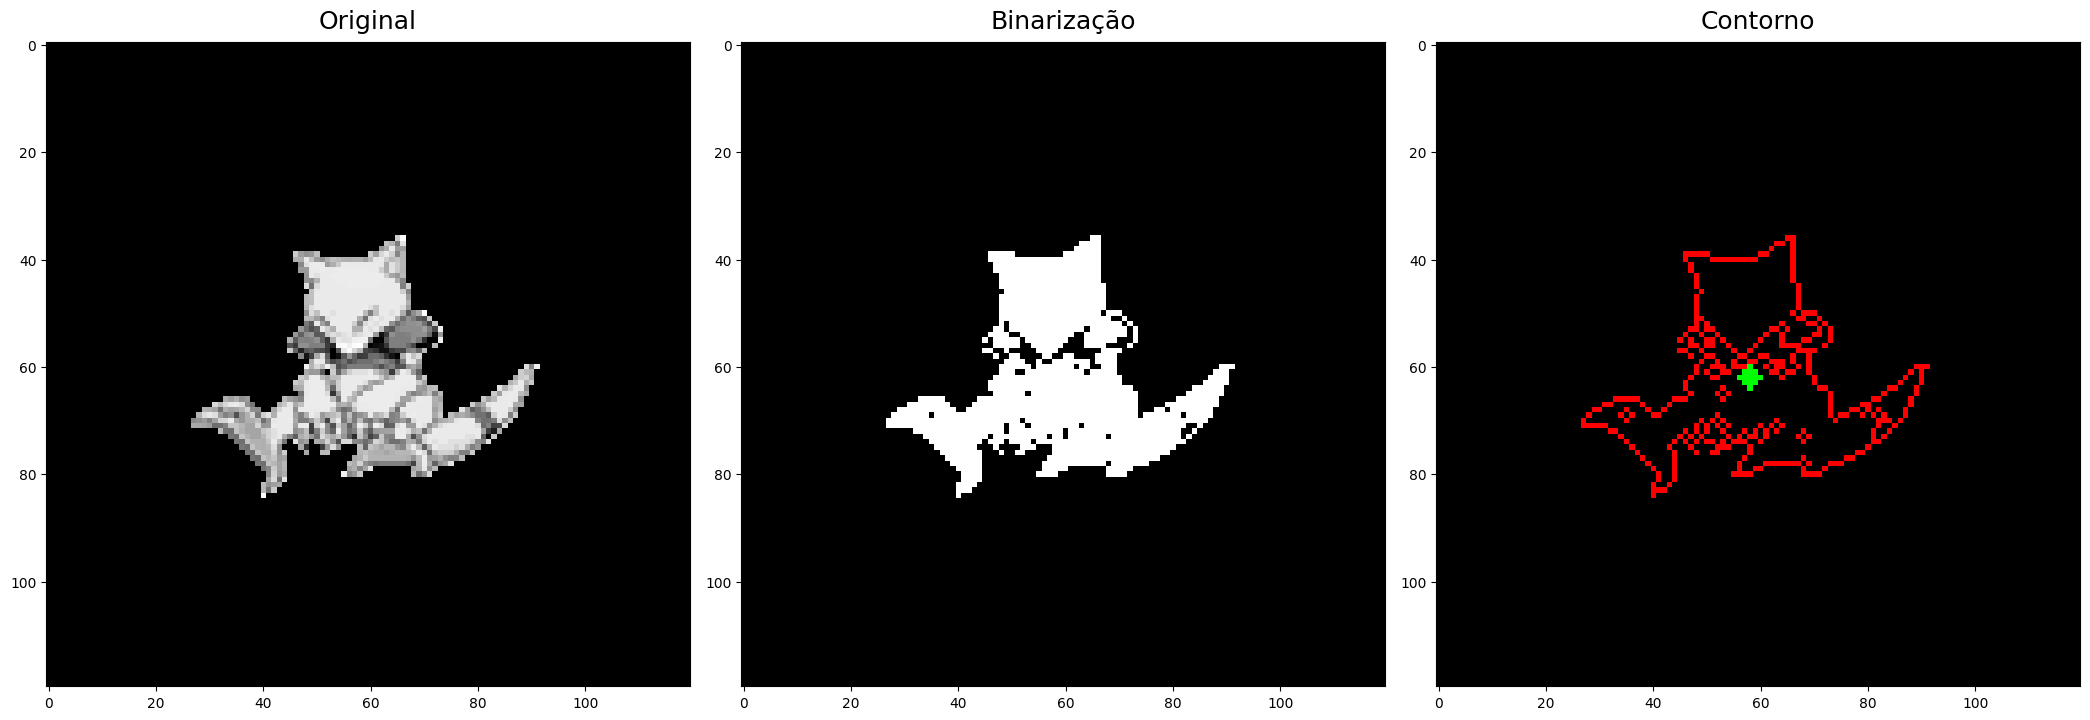

In [17]:
# Calcular os momentos da imagem binária
moments = cv2.moments(thresh)

# Interpretar os principais momentos
area = moments['m00']
centroid_x = moments['m10'] / area
centroid_y = moments['m01'] / area

print(f"Área: {area}")
print(f"Centroide: ({centroid_x}, {centroid_y})")

# Desenhar o centroide na imagem de contorno
cv2.circle(img_contours, (int(centroid_x), int(centroid_y)), 2, (0, 255, 0), -1)

# Exibir a imagem original, binarizada e com contornos
showImages([img_gray, thresh, img_contours], ["Original", "Binarização", "Contorno"], size=(21, 7), grid=(1, 3))

Perímetro: 281.39191579818726


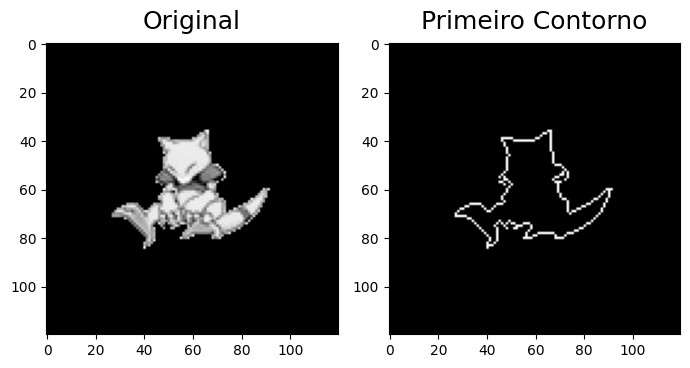

In [18]:
# Calcular o perímetro (comprimento do arco) do contorno
perimeter = cv2.arcLength(contours[0], False) 

# True indica que o contorno é uma forma fechada, e a função considerará a última aresta conectando o último ponto de volta ao primeiro ponto.
# False Indica que o contorno é uma curva aberta, e a função não conectará o último ponto de volta ao primeiro ponto.

print(f"Perímetro: {perimeter}")

# Criar uma imagem em branco (preta) do mesmo tamanho da imagem original
img_first_contour = np.zeros_like(img)

# Desenhar o primeiro contorno na imagem em branco
cv2.drawContours(img_first_contour, [contours[0]], -1, (255, 255, 255), 1)

# Exibir a imagem original e a imagem com o primeiro contorno desenhado
showImages([img_gray, img_first_contour], ["Original", "Primeiro Contorno"], size=(7, 4), grid=(1, 2))

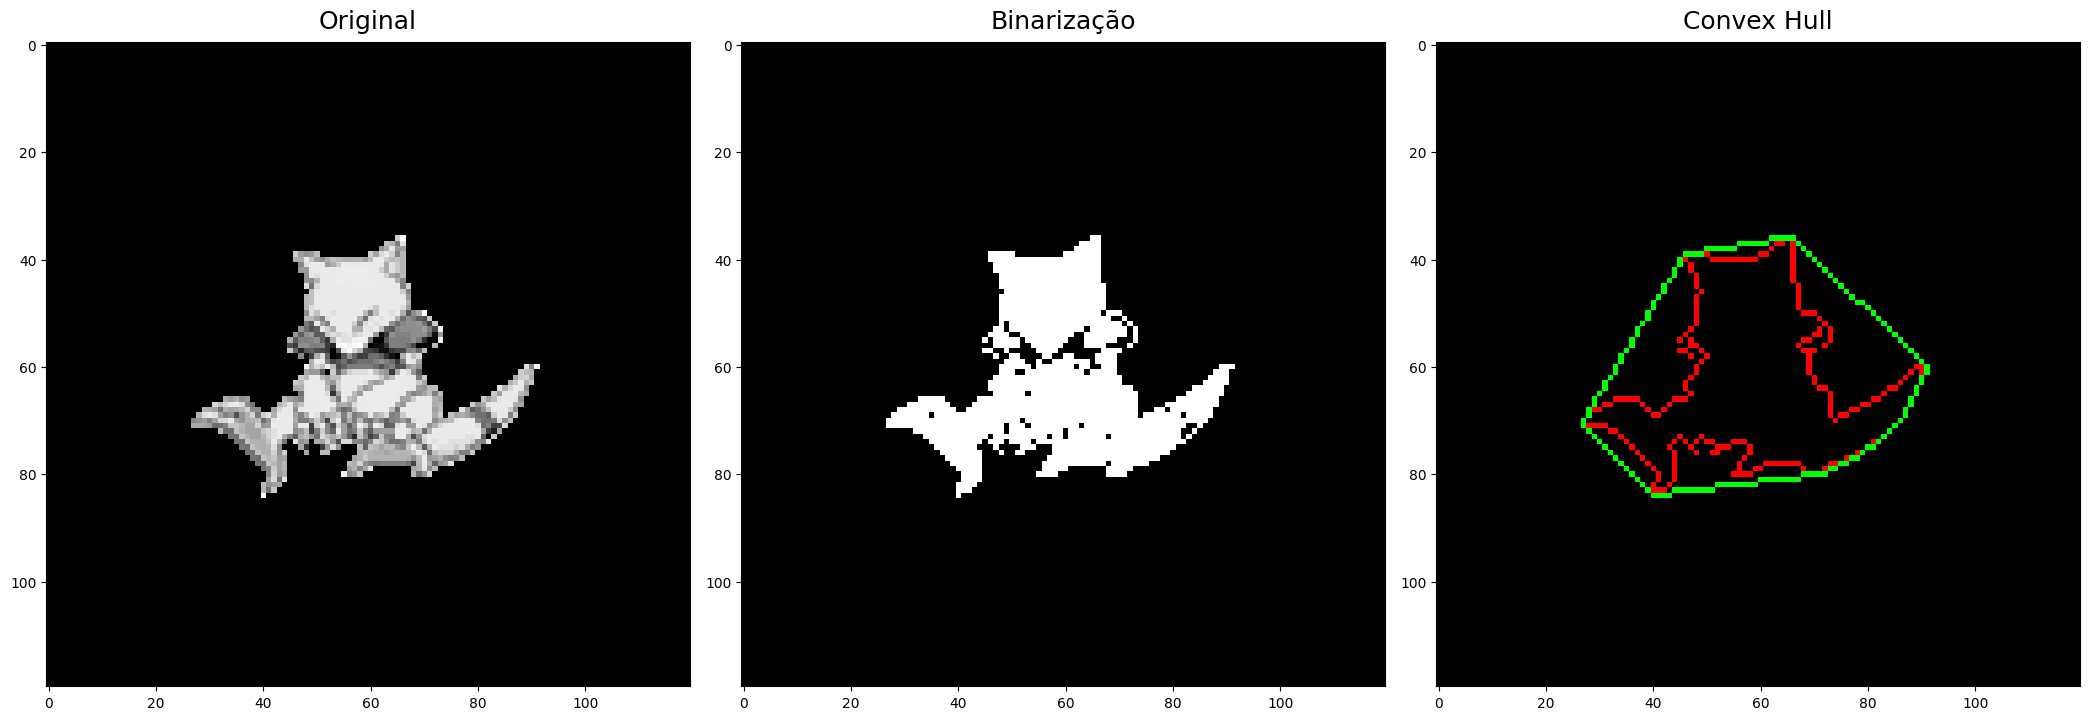

In [19]:
# Calcular o convexHull
hull = cv2.convexHull(contours[0])

# Criar uma imagem em branco (preta) do mesmo tamanho da imagem original
img_contour_hull = np.zeros_like(img)

# Desenhar o primeiro contorno na imagem em branco
cv2.drawContours(img_contour_hull, [contours[0]], -1, (255, 0, 0), 1)

# Desenhar o convexHull na imagem em branco
cv2.drawContours(img_contour_hull, [hull], -1, (0, 255, 0), 1)

# Exibir a imagem original, a imagem com o primeiro contorno e a imagem com o convexHull
showImages([img_gray, thresh, img_contour_hull], ["Original", "Binarização", "Convex Hull"], size=(21, 7), grid=(1, 3))

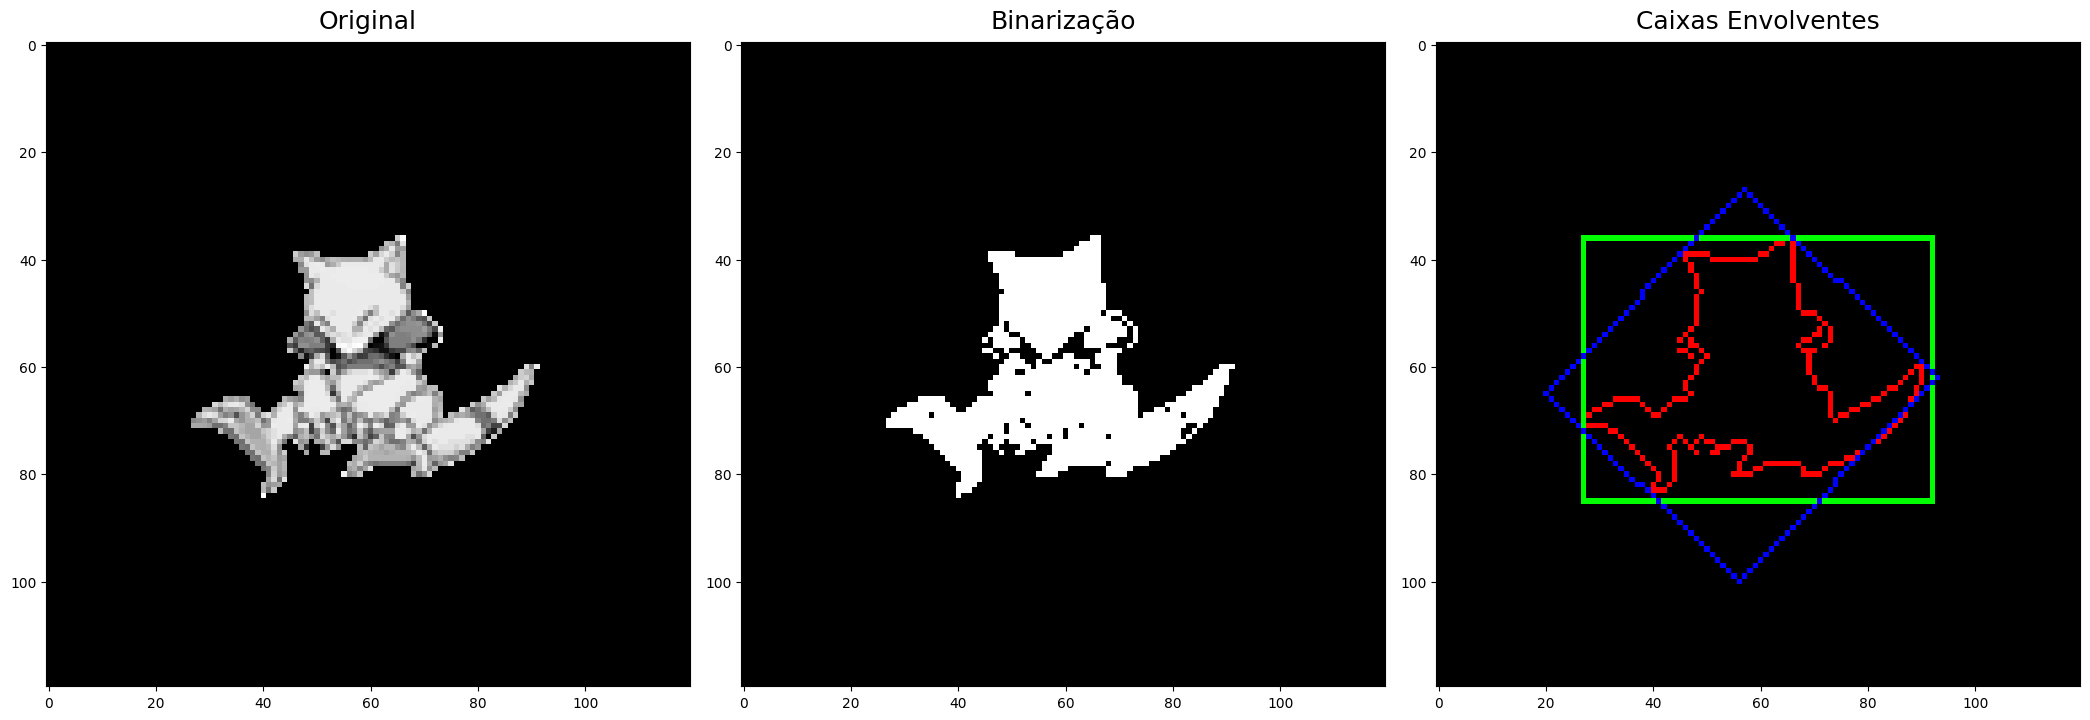

In [21]:
# Calcular o retângulo envolvente
x, y, w, h = cv2.boundingRect(contours[0])

# Calcular o retângulo envolvente rotacionado
rect = cv2.minAreaRect(contours[0])
box = cv2.boxPoints(rect)
box = np.intp(box)

# Criar uma imagem em branco (preta) do mesmo tamanho da imagem original
img_combined = np.zeros_like(img)

# Desenhar o primeiro contorno na imagem em branco
cv2.drawContours(img_combined, [contours[0]], -1, (255, 0, 0), 1)

# Desenhar o retângulo envolvente
cv2.rectangle(img_combined, (x, y), (x+w, y+h), (0, 255, 0), 1)

# Desenhar o retângulo envolvente rotacionado
cv2.drawContours(img_combined, [box], 0, (0, 0, 255), 1)

# Exibir a imagem original, a imagem binarizada, a imagem com o retângulo envolvente e a imagem com o retângulo envolvente rotacionado
showImages([img_gray, thresh, img_combined], ["Original", "Binarização", "Caixas Envolventes"], size=(21, 7), grid=(1, 3))